<a href="https://colab.research.google.com/github/Shibata18/DataSciencePandas/blob/master/5_5_Explora%C3%A7%C3%A3o_com_Gr%C3%A1ficos_e_Mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.5 - Exploração com Gráficos e Mapas**



1. **Lista de itens obrigatórios para essa exploração**

1.   Agora você deve fazer um gráfico utilizando informações provenientes de uma consulta. Percebemos quais são os quatro estados que possuem maior frequência de relatos, assim como os tipos de OVNIs mais populares. Portanto, você deve fazer dois gráficos que envolvam essas informações.
1. Gráfico de barras agrupadas

2. Gráfico de barras agrupadas

1.   Enriqueceremos os dados ainda mais, dessa vez na forma de mapas. Para construirmos mapas precisamos de latitude e longitude (usar a biblioteca zipcodes . Para criar os mapas você pode utilizar o gmaps , matplotlib > basemap  ou folium .

2.   Criar um mapa do país inteiro (EUA) e plotar no mapa as ocorrências para todas as cidades. De forma a construir uma representação visual da quantidade de ocorrências por cidade e estado. Isso permitirá uma ideia geral dos dados.
Exemplos: https://photos.app.goo.gl/aWiUuzurfpLkaxik9 

1.  
A próxima etapa é criar um mapa apenas do estado da Califórnia, para analisar se essas visualizações se distribuem de forma homogênea dentro do estado.
Exemplos: https://photos.app.goo.gl/eHSQoc9mhk9cSgd58 
2.   Onde na Califórnia está localizada a maior quantidade de visualizações de objetos voadores não identificados? E qual será a razão?







In [ ]:
df_just_usa = pd.read_csv('apenas_usa.csv')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT State, city,Count(City) as 'Numero de Ocorrencias', Shape FROM df_just_usa  group by State,shape  having count(City)>=10 order by  count(City) desc 
'''
ocorrencia_usa_all_state = pandasql.sqldf(query.lower(), locals())
ocorrencia_usa_all_state

,State,City,numero de ocorrencias,Shape
0,CA,Davis,1700,Light
1,CA,Chino,880,Circle
2,FL,Davenport,824,Light
3,WA,Coulee Dam,778,Light
4,CA,Corona,703,Fireball
...,...,...,...,...
803,UT,South Jordan,10,Rectangle
804,UT,Garden City,10,Teardrop
805,VT,West Topsham,10,Changing
806,VT,Milton,10,Disk


In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT State,Count(State) as 'Numero de Ocorrencias', Shape FROM df_just_usa where State like '%CA%'  group by State,Shape  having count(State)>=10 order by  count(State) desc limit 4
'''
ca_ocorrencias = pandasql.sqldf(query.lower(), locals())
ca_ocorrencias

,State,numero de ocorrencias,Shape
0,CA,1700,Light
1,CA,880,Circle
2,CA,703,Fireball
3,CA,640,Triangle


In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT State,Count(State) as 'Numero de Ocorrencias', Shape FROM df_just_usa  where State like '%FL%' group by State,Shape  having count(State)>=10 order by  count(State) desc limit 4
'''
fl_ocorrencias = pandasql.sqldf(query.lower(), locals())
fl_ocorrencias

,State,numero de ocorrencias,Shape
0,FL,824,Light
1,FL,551,Circle
2,FL,541,Fireball
3,FL,343,Triangle


In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT State,Count(State) as 'Numero de Ocorrencias', Shape FROM df_just_usa  where State like '%WA%' group by State,Shape  having count(State)>=10 order by  count(State) desc limit 5
'''
wa_ocorrencias = pandasql.sqldf(query.lower(), locals())
wa_ocorrencias =wa_ocorrencias.drop(index=3)
wa_ocorrencias

,State,numero de ocorrencias,Shape
0,WA,779,Light
1,WA,329,Circle
2,WA,296,Fireball
4,WA,245,Triangle


In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT State,Count(State) as 'Numero de Ocorrencias', Shape FROM df_just_usa  where State like '%tx%' group by State,Shape  having count(State)>=10 order by  count(State) desc limit 6
'''
tx_ocorrencias = pandasql.sqldf(query.lower(), locals())
tx_ocorrencias = tx_ocorrencias.drop(index=[3,4])
tx_ocorrencias

,State,numero de ocorrencias,Shape
0,TX,579,Light
1,TX,301,Triangle
2,TX,290,Circle
5,TX,183,Fireball


In [ ]:
state_shape = pd.concat([wa_ocorrencias,fl_ocorrencias,tx_ocorrencias,ca_ocorrencias])
state_shape

,State,numero de ocorrencias,Shape
0,WA,779,Light
1,WA,329,Circle
2,WA,296,Fireball
4,WA,245,Triangle
0,FL,824,Light
1,FL,551,Circle
2,FL,541,Fireball
3,FL,343,Triangle
0,TX,579,Light
1,TX,301,Triangle


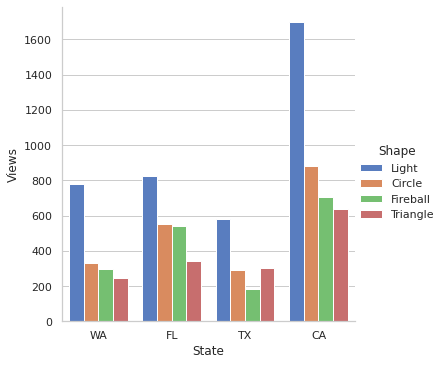

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.catplot(x="State", y="numero de ocorrencias", hue='Shape', data=state_shape, kind="bar", palette="muted")
g.set_ylabels("Views")
g.set_xlabels("State")

plt.savefig("grafico_barras.png", bbox_inches='tight',pad_inches=0.1)

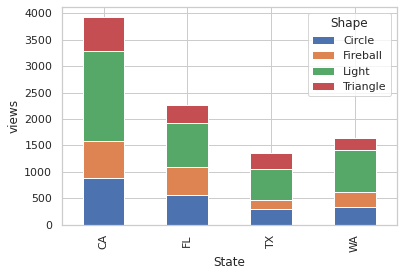

<Figure size 432x288 with 0 Axes>

In [ ]:
state_shape.groupby(['State','Shape']).sum().unstack().plot(kind='bar',y='numero de ocorrencias', stacked=True)
plt.ylabel("views")
plt.xlabel("State")
plt.show()
plt.savefig("grafico_empilhado.png");

In [ ]:
#forma 2 de filtrar as cidades e estados dos EUA e agregar a latitude e longitude
#instalando a bibioteca zipcode
!pip install zipcodes
#importando a biblioteca zipcode
import zipcodes
#listando o conteúdo da biblioteca zipcode que está em formato json
zipcodes_json = zipcodes.list_all()
#transformando em um Dataframe a biblioteca zipcode
df_zipcodes = pd.DataFrame(zipcodes_json)
df_zipcodes

     |████████████████████████████████| 727kB 3.4MB/s 


,zip_code,zip_code_type,active,city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,lat,long
0,00501,UNIQUE,True,Holtsville,[],[I R S Service Center],NY,Suffolk County,America/New_York,[631],NA,US,40.8179,-73.0453
1,00544,UNIQUE,True,Holtsville,[],[Irs Service Center],NY,Suffolk County,America/New_York,[631],NA,US,40.7888,-73.0394
2,00601,STANDARD,True,Adjuntas,[],"[Colinas Del Gigante, Jard De Adjuntas, Urb Sa...",PR,Adjuntas Municipio,America/Puerto_Rico,"[787, 939]",NA,US,18.1967,-66.7367
3,00602,STANDARD,True,Aguada,[],"[Alts De Aguada, Bo Guaniquilla, Comunidad Las...",PR,Aguada Municipio,America/Puerto_Rico,"[787, 939]",NA,US,18.3529,-67.1775
4,00603,STANDARD,True,Aguadilla,[Ramey],"[Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceib...",PR,Aguadilla Municipio,America/Puerto_Rico,[787],NA,US,18.4586,-67.1299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42627,99926,PO BOX,True,Metlakatla,[],[],AK,Prince of Wales-Outer Ketchikan Borough,America/Metlakatla,[907],NA,US,55.1450,-131.5439
42628,99927,PO BOX,True,Point Baker,[],[],AK,Prince of Wales-Hyder Census Area,America/Sitka,[907],NA,US,56.1513,-133.3490
42629,99928,PO BOX,True,Ward Cove,[],[],AK,Ketchikan Gateway Borough,America/Sitka,[907],NA,US,55.4104,-131.7237
42630,99929,PO BOX,True,Wrangell,[],[],AK,Wrangell City and Borough,America/Sitka,[907],NA,US,56.1800,-132.0304


In [ ]:
#Filtrando multiplas colunas
df_zipcodes = df_zipcodes[['zip_code','city','state','lat','long']]
df_zipcodes

,zip_code,city,state,lat,long
0,00501,Holtsville,NY,40.8179,-73.0453
1,00544,Holtsville,NY,40.7888,-73.0394
2,00601,Adjuntas,PR,18.1967,-66.7367
3,00602,Aguada,PR,18.3529,-67.1775
4,00603,Aguadilla,PR,18.4586,-67.1299
...,...,...,...,...,...
42627,99926,Metlakatla,AK,55.1450,-131.5439
42628,99927,Point Baker,AK,56.1513,-133.3490
42629,99928,Ward Cove,AK,55.4104,-131.7237
42630,99929,Wrangell,AK,56.1800,-132.0304


In [ ]:
#inplace, salva no mesmo Dataframe
# Removendo os dados duplicados nas colunas city e state
df_zipcodes.drop_duplicates(subset=['city','state'],inplace=True)
df_zipcodes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,zip_code,city,state,lat,long
0,00501,Holtsville,NY,40.8179,-73.0453
2,00601,Adjuntas,PR,18.1967,-66.7367
3,00602,Aguada,PR,18.3529,-67.1775
4,00603,Aguadilla,PR,18.4586,-67.1299
7,00606,Maricao,PR,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,Klawock,AK,55.5498,-132.9676
42627,99926,Metlakatla,AK,55.1450,-131.5439
42628,99927,Point Baker,AK,56.1513,-133.3490
42629,99928,Ward Cove,AK,55.4104,-131.7237


In [ ]:
df_ovnis = pd.read_csv("OVNIS.csv")

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT State, city,Count(*) as Views FROM df_ovnis  group by State,city  order by Views desc
'''
df_filtrado = pandasql.sqldf(query.lower(), locals())
df_filtrado.to_csv('filtrado_mapa.csv',index=False)
df_filtrado

,State,City,views
0,AZ,Phoenix,360
1,NV,Las Vegas,334
2,WA,Seattle,322
3,OR,Portland,279
4,CA,San Diego,269
...,...,...,...
20565,YT,Richards Bay (KwaZulu-Natal)(South Africa),1
20566,YT,Teslin (Canada),1
20567,YT,Watson Lake (Canada),1
20568,YT,Yukon City (Canada),1


Passos que o professor Fábio aconselhou para gerar os mapas
1. nomes das colunas em que ira acontecer o merge devem ser identicas, ou seja, devem ser padronizadas. (Letras Minúsculas)
2. Verificar se está igual df_zipcodes e df_filtrado
3. 2ºPadronizar(minusculo) os nomes das Cidades e Estados no Dataframe que serão usados para o merge. Conteúdo e o Cabeçalho
5. 3º Utilizar o merge
6. Passo 3. Só ira funcionar se estiver padronizado
7. df_merged = df_filtrado.merge(df_zipcodes, on=['state','city'])
8. df_merged servirá para fazer o mapa
9. gmaps, views = peso


In [ ]:
# Transformando as colunas do df_filtrando em minusculas
df_filtrado.columns =  map(str.lower, df_filtrado.columns)
df_filtrado

,state,city,views
0,AZ,Phoenix,360
1,NV,Las Vegas,334
2,WA,Seattle,322
3,OR,Portland,279
4,CA,San Diego,269
...,...,...,...
20565,YT,Richards Bay (KwaZulu-Natal)(South Africa),1
20566,YT,Teslin (Canada),1
20567,YT,Watson Lake (Canada),1
20568,YT,Yukon City (Canada),1


In [ ]:
#Colocando as colunas do df_zipcodes em letras minusculas
df_zipcodes.columns = map(str.lower,df_zipcodes.columns)
df_zipcodes

,zip_code,city,state,lat,long
0,00501,Holtsville,NY,40.8179,-73.0453
2,00601,Adjuntas,PR,18.1967,-66.7367
3,00602,Aguada,PR,18.3529,-67.1775
4,00603,Aguadilla,PR,18.4586,-67.1299
7,00606,Maricao,PR,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,Klawock,AK,55.5498,-132.9676
42627,99926,Metlakatla,AK,55.1450,-131.5439
42628,99927,Point Baker,AK,56.1513,-133.3490
42629,99928,Ward Cove,AK,55.4104,-131.7237


In [ ]:
#Transformando Os dados do df_filtrado na coluna city em letras minusculas 
df_filtrado["city"] = df_filtrado["city"].str.lower()
df_filtrado

,state,city,views
0,AZ,phoenix,360
1,NV,las vegas,334
2,WA,seattle,322
3,OR,portland,279
4,CA,san diego,269
...,...,...,...
20565,YT,richards bay (kwazulu-natal)(south africa),1
20566,YT,teslin (canada),1
20567,YT,watson lake (canada),1
20568,YT,yukon city (canada),1


In [ ]:
#Transformando Os dados do df_zipcodes na coluna city em letras minusculas 
df_zipcodes["city"] = df_zipcodes["city"].str.lower()
df_zipcodes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip_code,city,state,lat,long
0,00501,holtsville,NY,40.8179,-73.0453
2,00601,adjuntas,PR,18.1967,-66.7367
3,00602,aguada,PR,18.3529,-67.1775
4,00603,aguadilla,PR,18.4586,-67.1299
7,00606,maricao,PR,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,klawock,AK,55.5498,-132.9676
42627,99926,metlakatla,AK,55.1450,-131.5439
42628,99927,point baker,AK,56.1513,-133.3490
42629,99928,ward cove,AK,55.4104,-131.7237


In [ ]:
#Transformando Os dados do df_filtrado na coluna state em letras minusculas 
df_filtrado["state"] = df_filtrado["state"].str.lower()
df_filtrado

,state,city,views
0,az,phoenix,360
1,nv,las vegas,334
2,wa,seattle,322
3,or,portland,279
4,ca,san diego,269
...,...,...,...
20565,yt,richards bay (kwazulu-natal)(south africa),1
20566,yt,teslin (canada),1
20567,yt,watson lake (canada),1
20568,yt,yukon city (canada),1


In [ ]:
#Transformando Os dados do df_zipcodes na coluna state em letras minusculas 
df_zipcodes["state"] = df_zipcodes["state"].str.lower()
df_zipcodes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip_code,city,state,lat,long
0,00501,holtsville,ny,40.8179,-73.0453
2,00601,adjuntas,pr,18.1967,-66.7367
3,00602,aguada,pr,18.3529,-67.1775
4,00603,aguadilla,pr,18.4586,-67.1299
7,00606,maricao,pr,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,klawock,ak,55.5498,-132.9676
42627,99926,metlakatla,ak,55.1450,-131.5439
42628,99927,point baker,ak,56.1513,-133.3490
42629,99928,ward cove,ak,55.4104,-131.7237


In [ ]:
#Juntando os dataframes df_filtrado e df_zipcodes nas colunas state e city
df_merged = df_filtrado.merge(df_zipcodes, on=['state','city'])
df_merged

,state,city,views,zip_code,lat,long
0,az,phoenix,360,85001,33.4486,-112.0733
1,nv,las vegas,334,89101,36.1736,-115.1264
2,wa,seattle,322,98101,47.6110,-122.3335
3,or,portland,279,97201,45.5074,-122.6898
4,ca,san diego,269,92101,32.7199,-117.1805
...,...,...,...,...,...,...
10957,wy,recluse,1,82725,44.8203,-105.7762
10958,wy,rozet,1,82727,44.1855,-105.2337
10959,wy,saratoga,1,82331,41.4684,-106.7911
10960,wy,shawnee,1,82229,42.8910,-105.1056
